In [1]:
import TurbPy as tb
from TurbPy.imports import *

In [2]:
# deck = 'KH_Lv1di/'
# deck = 'turb2/'
# deck = 'turb_vth0.01/'
# deck = 'KH_test/'
# deck = 'KH_beta0.1/'
# deck = 'KH_subash/'
# deck = 'KH_new/'
# deck = 'KH_800ppc/'
# deck = 'KH_400ppc_200wci2/'
deck = 'KH_200ppc_200wci/'


dirs = '/pscratch/sd/g/goodwill/' + deck

figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)/(info['Lx/de'] * info['Ly/de'] * info['Lz/de'])

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

twce_out = np.linspace(0, times[-1] * info['dt*wce'], len(en_out['EM']))
twce = np.linspace(0, times[-1] * info['dt*wce'], len(times))

lx = np.linspace(0, info['Lx/di'], int(info['nx']))
ly = np.linspace(0, info['Ly/di'], int(info['ny']))

In [3]:
print(twci[317])
print(times[1087])

43.77985560000001
543500


In [4]:
t = 317
el = tb.load_hydro_fil(dirs, times[t], species = 'electron')
ion = tb.load_hydro_fil(dirs, times[t], species = 'ion')
f = tb.load_field_fil(dirs, times[t])

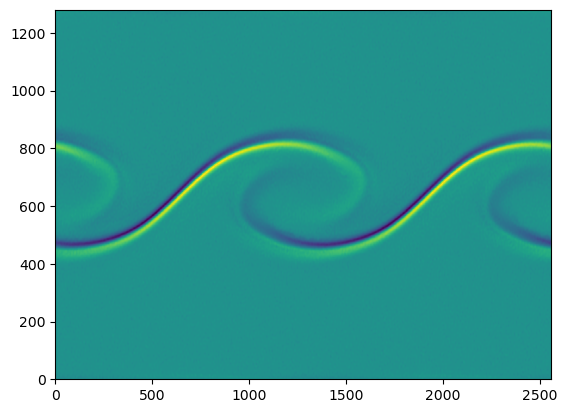

In [5]:
plt.pcolormesh(el['jz'])

In [6]:
t = 317
el = tb.load_hydro(dirs, times[t], species = 'electron')
ion = tb.load_hydro(dirs, times[t], species = 'ion')
f = tb.load_fields(dirs, times[t])

In [7]:
snaps = [363, 507, 652, 1087]
print(twci[snaps])

[ 50.1327684  70.0201476  90.0456336 150.1220916]


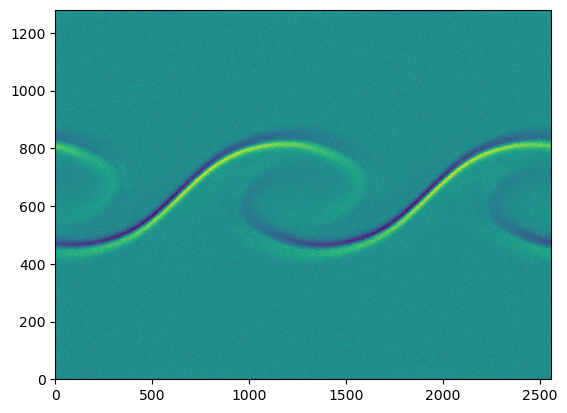

In [8]:
plt.pcolormesh(el['jz'])

363
507
652
1087


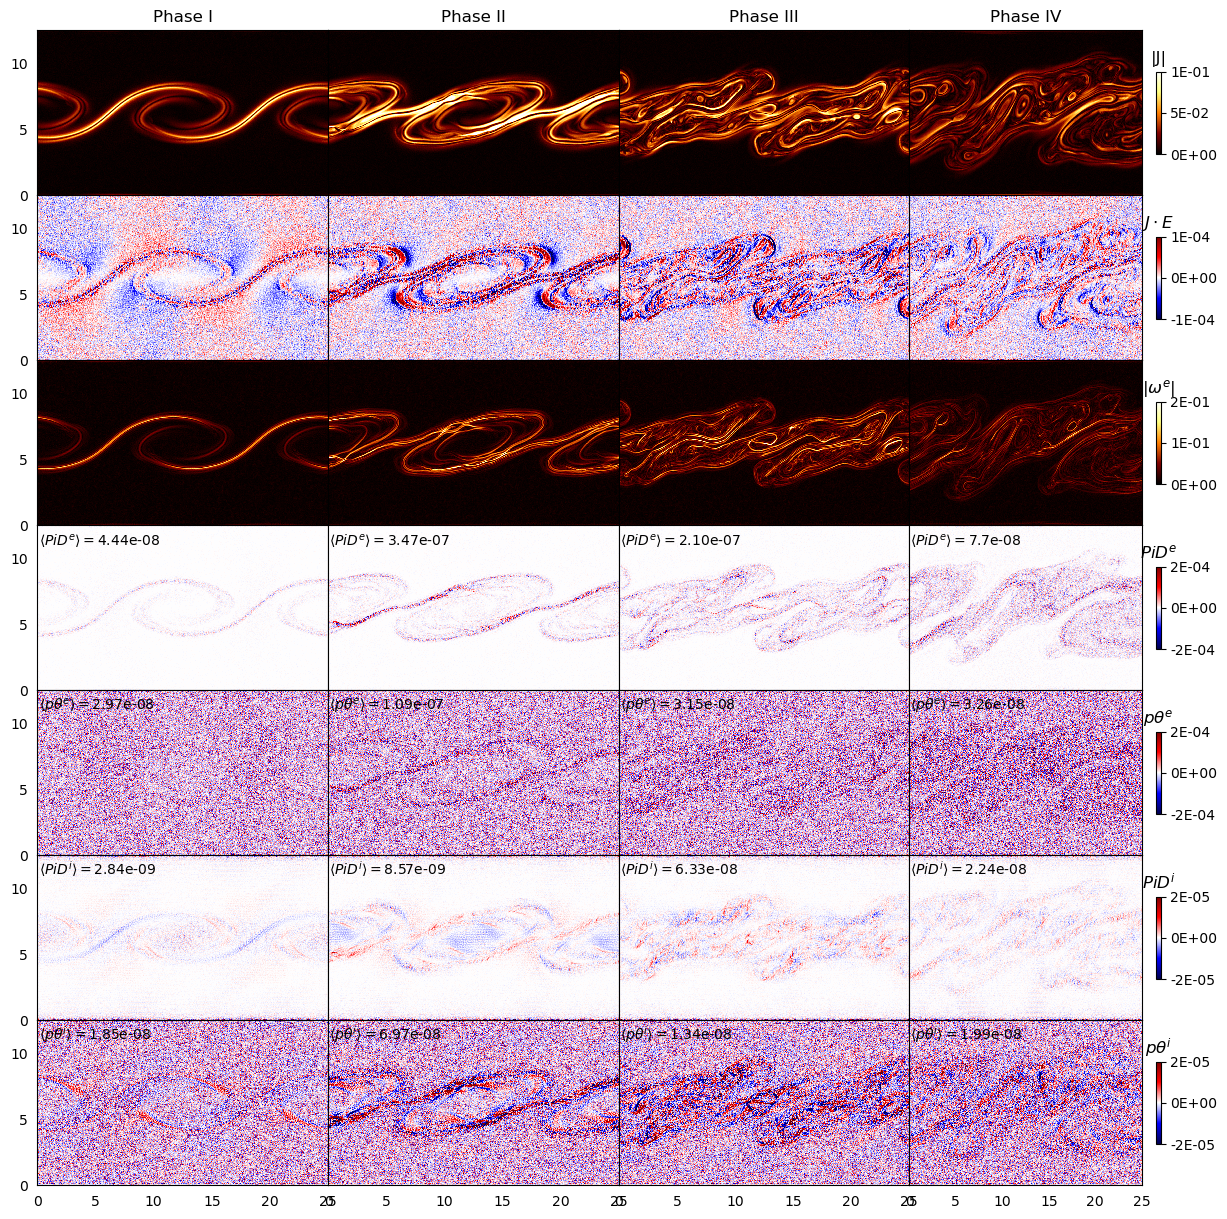

In [17]:
fig, axs = plt.subplots(7,4, figsize=(15, 15), sharex = True, sharey = True)
fig.subplots_adjust(wspace = 0, hspace = 0)
snaps = [363, 507, 652, 1087]
for i in np.arange(len(snaps)):
  t = snaps[i]
  print(t)
  el = tb.load_hydro_fil(dirs, times[t], species = 'electron')
  ion = tb.load_hydro_fil(dirs, times[t], species = 'ion')
  f = tb.load_field_fil(dirs, times[t])

  j = np.sqrt((el['jx'] + ion['jx'])**2 + (el['jy'] + ion['jy'])**2 + (el['jz'] + ion['jz'])**2 )
  by = f['cby']
  we = tb.pcurl(el['jx']/el['rho'], el['jy']/el['rho'], el['jz']/el['rho'], dx = info['Lx/de']/info['nx'], dy = info['Ly/de']/info['ny'])
  we_abs = np.sqrt(we[0]**2 + we[1]**2 + we[2]**2)
  pthe, pide = tb.ps_calc(dirs, times[20], species = 'electron')


  
  pthe, pide = tb.ps_calc(dirs, times[t], kfilt = True, species = 'electron')
  pthi, pidi = tb.ps_calc(dirs, times[t], kfilt = True, species = 'ion')
  JiE, JeE, JE = tb.JE_calc(dirs, times[t])

  hot = 'afmhot'
  seis = 'seismic'
  cm1 = axs[0,i].pcolormesh(ly,lx,j, cmap = hot, vmin = 0, vmax = 0.1) 
  cm2 = axs[1,i].pcolormesh(ly,lx,JE, cmap = seis, vmin = -0.0001, vmax = 0.0001) 
  cm3 = axs[2,i].pcolormesh(ly,lx,we_abs, cmap = hot,  vmin = 0, vmax = 0.2) 
  cm4 = axs[3,i].pcolormesh(ly,lx, pide, cmap = seis,  vmin = -0.0002, vmax = 0.0002) 
  cm5 = axs[4,i].pcolormesh(ly,lx, pthe, cmap = seis,  vmin = -0.0002, vmax = 0.0002)
  cm6 = axs[5,i].pcolormesh(ly,lx, pidi, cmap = seis,  vmin = -0.00002, vmax = 0.00002) 
  cm7 = axs[6,i].pcolormesh(ly,lx, pthi, cmap = seis,  vmin = -0.00002, vmax = 0.00002)

  axs[0,i].tick_params(left = False, right = False, top = False, bottom = False)
  axs[1,i].tick_params(left = False, right = False, top = False, bottom = False)
  axs[2,i].tick_params(left = False, right = False, top = False, bottom = False)
  axs[3,i].tick_params(left = False, right = False, top = False, bottom = False)
  axs[4,i].tick_params(left = False, right = False, top = False, bottom = False)
  axs[5,i].tick_params(left = False, right = False, top = False, bottom = False)
  axs[6,i].tick_params(left = False, right = False, top = False, bottom = False)

  axs[3,i].text(0.1,11, r'$\langle PiD^e\rangle = $'f'{np.format_float_scientific(np.average(pide), precision = 2)}')
  axs[4,i].text(0.1,11, r'$\langle p \theta^e\rangle = $'f'{np.format_float_scientific(np.average(pthe), precision = 2)}')
  axs[5,i].text(0.1,11, r'$\langle PiD^i\rangle = $'f'{np.format_float_scientific(np.average(pidi), precision = 2)}')
  axs[6,i].text(0.1,11, r'$\langle p \theta^i\rangle = $'f'{np.format_float_scientific(np.average(pthi), precision = 2)}')



  if i == len(snaps)-1:
    cb1 = fig.colorbar(cm1 , ax = axs[0,i], shrink = 0.5, format = '%.0E')
    cb2 = fig.colorbar(cm2 , ax=  axs[1,i], shrink = 0.5, format = '%.0E')
    cb3 = fig.colorbar(cm3 , ax = axs[2,i], shrink = 0.5, format = '%.0E')
    cb4 = fig.colorbar(cm4 , ax = axs[3,i], shrink = 0.5, format = '%.0E')
    cb5 = fig.colorbar(cm5 , ax = axs[4,i], shrink = 0.5, format = '%.0E')
    cb6 = fig.colorbar(cm6 , ax = axs[5,i], shrink = 0.5, format = '%.0E')
    cb7 = fig.colorbar(cm7 , ax = axs[6,i], shrink = 0.5, format = '%.0E')

cb1.ax.set_title('|J|')
cb2.ax.set_title(r'$J \cdot E$')
cb3.ax.set_title(r'|$\omega^e$|')
cb4.ax.set_title(r'$PiD^e$')
cb5.ax.set_title(r'$p \theta^e$')
cb6.ax.set_title(r'$PiD^i$')
cb7.ax.set_title(r'$p \theta^i$')
axs[0,0].set_title(r'Phase I')
axs[0,1].set_title(r'Phase II')
axs[0,2].set_title(r'Phase III')
axs[0,3].set_title(r'Phase IV')

plt.savefig(figs + 'snaps.png')

In [ ]:
# fig, axs = plt.subplots(7,4, figsize=(15, 15), sharex = True, sharey = True, layout='constrained')
# snaps = [363, 507, 652, 1087]
# for i in np.arange(len(snaps)):
#   t = snaps[i]
#   el = tb.load_hydro(dirs, times[t], species = 'electron')
#   ion = tb.load_hydro(dirs, times[t], species = 'ion')
#   f = tb.load_fields(dirs, times[t])

#   j = np.sqrt((el['jx'] + ion['jx'])**2 + (el['jy'] + ion['jy'])**2 + (el['jz'] + ion['jz'])**2 )
#   by = f['cby']
#   we = tb.pcurl(el['jx']/el['rho'], el['jy']/el['rho'], el['jz']/el['rho'], dx = info['Lx/de']/info['nx'], dy = info['Ly/de']/info['ny'])
#   we_abs = np.sqrt(we[0]**2 + we[1]**2 + we[2]**2)
#   pthe, pide = tb.ps_calc(dirs, times[20], species = 'electron')


  
#   pthe, pide = tb.ps_calc(dirs, times[t], kfilt = False, species = 'electron')
#   pthi, pidi = tb.ps_calc(dirs, times[t], kfilt = False, species = 'ion')

#   hot = 'afmhot'
#   seis = 'seismic'
#   cm1 = axs[0,i].pcolormesh(ly,lx,j, cmap = hot, vmin = 0, vmax = 0.1) 
#   cm2 = axs[1,i].pcolormesh(ly,lx,by, cmap = seis, vmin = -1.0, vmax = 1.0) 
#   cm3 = axs[2,i].pcolormesh(ly,lx,we_abs, cmap = hot,  vmin = 0, vmax = 0.2) 
#   cm4 = axs[3,i].pcolormesh(ly,lx, pide, cmap = seis,  vmin = -0.0001, vmax = 0.0001) 
#   cm5 = axs[4,i].pcolormesh(ly,lx, pthe, cmap = seis,  vmin = -0.0005, vmax = 0.0005)
#   cm6 = axs[5,i].pcolormesh(ly,lx, pidi, cmap = seis,  vmin = -0.00001, vmax = 0.00001) 
#   cm7 = axs[6,i].pcolormesh(ly,lx, pthi, cmap = seis,  vmin = -0.00005, vmax = 0.00005)

#   axs[0,i].set_title(r'$t\omega_{ci} = $'f'{np.round(twci[t],2)}')

#   axs[3,i].set_title(r'$\langle PiD^e\rangle = $'f'{np.format_float_scientific(np.average(pide), precision = 4)}')
#   axs[4,i].set_title(r'$\langle p \theta^e\rangle = $'f'{np.format_float_scientific(np.average(pthe), precision = 4)}')
#   axs[5,i].set_title(r'$\langle PiD^i\rangle = $'f'{np.format_float_scientific(np.average(pidi), precision = 4)}')
#   axs[6,i].set_title(r'$\langle p \theta^i\rangle = $'f'{np.format_float_scientific(np.average(pthi), precision = 4)}')

#   if i == len(snaps)-1:
#     fig.colorbar(cm1 , ax = axs[0,i], label = '|J|')
#     fig.colorbar(cm2 , ax=  axs[1,i], label = r'$B_y$')
#     fig.colorbar(cm3 , ax = axs[2,i], label = r'|$\omega^e$|')
#     fig.colorbar(cm4 , ax = axs[3,i], label = r'$PiD^e$')
#     fig.colorbar(cm5 , ax = axs[4,i], label = r'$p \theta^e$')
#     fig.colorbar(cm6 , ax = axs[5,i], label = r'$PiD^i$')
#     fig.colorbar(cm7 , ax = axs[6,i], label = r'$p \theta^i$')

# plt.savefig(figs + 'snaps.jpg', dpi = 400)